# P&D UFSM-CPFL - Energia Incidente
Autor: Prof. Rafael Concatto Beltrame
## Cálculo da Resitência Elétrica do Arco
Neste *script* será calculado o valor da **resistência elétrica do arco** com base nas **formas de onda de tensão e corrente da simulação** na plataforma Ansys.

### Bibliotecas

In [1]:
import numpy as np                       # Biblioteca numérica
import matplotlib.pyplot as plt          # Biblioteca gráfica
import csv                               # Biblioteca para manipulação de arquivos CSV
import pandas as pd                      # Biblioteca do pandas para análise de dados
from IPython.display import Image, Markdown # Biblioteca para importar figuras

### Circuito Elétrico

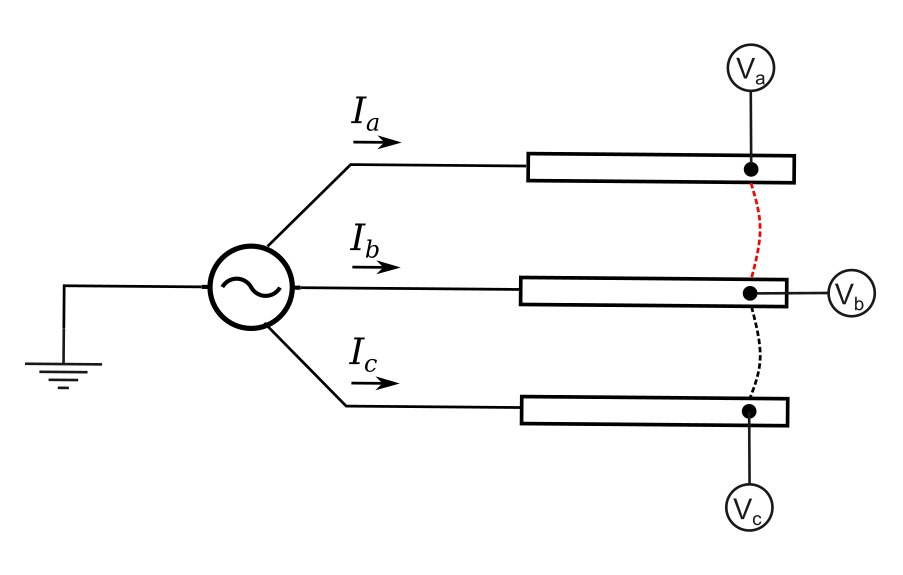

In [2]:
# Carrega e exibe figura
Image("circuit.jpeg", width = 500)

Para o arco entre as barras "a" e "b", tem-se:

$$ I_{arco,ab} = I_{a} $$
$$ V_{arco,ab} = V_{a}-V_{b} $$

Para o arco entre as barras "c" e "b", tem-se:

$$ I_{arco,cb} = I_{c} $$
$$ V_{arco,cb} = V_{c}-V_{b} $$

### Importação das Formas de Onda

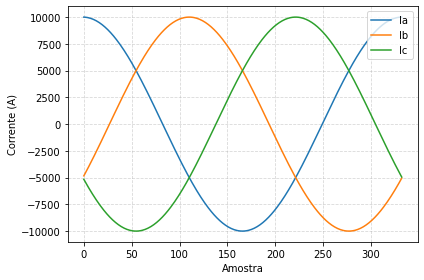

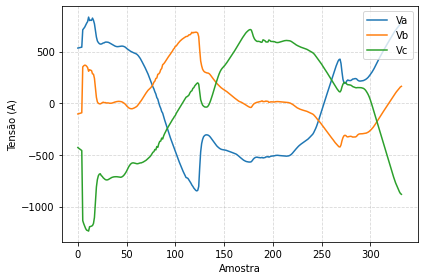

In [2]:
# ------------------------------------#
# Correntes                           #
#-------------------------------------#

# tt = []
# Ia = []
# Ib = []
# Ic = []
# 
# with open('current_in.csv', 'r') as csv_obj:           # Abre arquivo como objeto somente-leitura
#     csv_reader = csv.reader(csv_obj, delimiter=';')    # Realiza a leitura do objeto
#     header = next(csv_reader)                          # lê cabeçalho e passa à próxima linha
#     for linha in csv_reader:                           # Realiza a extração dos dados linha a linha
#         tt.append(float(linha[1]))                     # Vetor de tempos (s)
#         Ia.append(float(linha[2]) * area)              # Corrente do eletrodo "a" (A) = Jmag (A/m²) * Area (m²)
#         Ib.append(float(linha[3]) * area)              # Corrente do eletrodo "b" (A) = Jmag (A/m²) * Area (m²)
#         Ic.append(float(linha[4]) * area)              # Corrente do eletrodo "c" (A) = Jmag (A/m²) * Area (m²)

area = np.pi*(19.05e-3/2)**2                             # Área da seção transversal do condutor

df_corrente = pd.read_csv('current_in.csv', delimiter=";") # Lê o arquivo current_in.csv como um DataFrame
Ia = df_corrente['current_in_a'] * area                    # Corrente do eletrodo "a" (A) = Jmag (A/m²) * Area (m²)
Ib = df_corrente['current_in_b'] * area                    # Corrente do eletrodo "a" (A) = Jmag (A/m²) * Area (m²)
Ic = df_corrente['current_in_c'] * area                    # Corrente do eletrodo "a" (A) = Jmag (A/m²) * Area (m²)

# Visualização
plt.plot(Ia, label="Ia")
plt.plot(Ib, label="Ib")
plt.plot(Ic, label="Ic")
plt.legend(loc="upper right")
plt.xlabel('Amostra')
plt.ylabel('Corrente (A)')
plt.grid(b=True, alpha=0.5, ls='dashed')
plt.tight_layout()
plt.show()

#-------------------------------------#
# Tensões                             #
#-------------------------------------#

# tt = []
# Va = []
# Vb = []
# Vc = []
# 
# with open('tensao-rfile.csv', 'r') as csv_obj:         # Abre arquivo como objeto somente-leitura
#     csv_reader = csv.reader(csv_obj, delimiter=';')    # Realiza a leitura do objeto
#     header = next(csv_reader)                          # lê cabeçalho e passa à próxima linha
#     for linha in csv_reader:                           # Realiza a extração dos dados linha a linha
#         tt.append(float(linha[1]))                     # Vetor de tempos (s)
#         Va.append(float(linha[2]))                     # Tensão do eletrodo "a" (V)
#         Vb.append(float(linha[3]))                     # Tensão do eletrodo "b" (V)
#         Vc.append(float(linha[5]))                     # Tensão do eletrodo "c" (V)

df_tensao = pd.read_csv('tensao-rfile.csv', delimiter=";") # Lê o arquivo tensao-rfile.csv como um DataFrame
Va = df_tensao['tensao-a']                                 # Tensão do eletrodo "a" (V)
Vb = df_tensao['tensao-b']                                 # Tensão do eletrodo "b" (V)
Vc = df_tensao['tensao-c']                                 # Tensão do eletrodo "c" (V)

# Visualização
plt.plot(Va, label="Va")
plt.plot(Vb, label="Vb")
plt.plot(Vc, label="Vc")
plt.legend(loc="upper right")
plt.xlabel('Amostra')
plt.ylabel('Tensão (A)')
plt.grid(b=True, alpha=0.5, ls='dashed')
plt.tight_layout()
plt.show()

### Cálculo da Impedância do Arco

In [19]:
#-------------------------------------#
# Arco entre as barras "a" e "b"      #
#-------------------------------------#
Iarco_ab = np.array(Ia)                         # Corrente do arco (instantânea) (A)
Varco_ab = np.array(Va)-np.array(Vb)            # Tensão do arco (instantânea) (V)

N = len(Varco_ab)                               # Número de pontos
Iarco_ab_rms = np.sqrt( sum(Iarco_ab**2)/N )    # Corrente do arco (eficaz) (A) 
Varco_ab_rms = np.sqrt( sum(Varco_ab**2)/N )    # Tensão do arco (eficaz) (A)

Zarco_ab = Varco_ab_rms/Iarco_ab_rms            # Impedância do arco (Ohm)
display(Markdown(f"$$Zarco,ab = {Zarco_ab:.5f} \Omega$$"))

#-------------------------------------#
# Arco entre as barras "c" e "b"      #
#-------------------------------------#
Iarco_cb = np.array(Ic)                         # Corrente do arco (instantânea) (A)
Varco_cb = np.array(Vc)-np.array(Vb)            # Tensão do arco (instantânea) (V)

N = len(Varco_cb)                               # Número de pontos
Iarco_cb_rms = np.sqrt( sum(Iarco_cb**2)/N )    # Corrente do arco (eficaz) (A) 
Varco_cb_rms = np.sqrt( sum(Varco_cb**2)/N )    # Tensão do arco (eficaz) (A)

Zarco_cb = Varco_cb_rms/Iarco_cb_rms            # Impedância do arco (Ohm)
display(Markdown(f"$$Zarco,cb = {Zarco_cb:.5f} \Omega$$"))

$$Zarco,ab = 0.08944 \Omega$$

$$Zarco,cb = 0.09042 \Omega$$